In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE


In [4]:
df=pd.read_csv('ANSUR_2_M.csv', encoding = "ISO-8859-1")
for column in df.columns:
    print(column)
    
print(df.shape)

subjectid
abdominalextensiondepthsitting
acromialheight
acromionradialelength
anklecircumference
axillaheight
balloffootcircumference
balloffootlength
biacromialbreadth
bicepscircumferenceflexed
bicristalbreadth
bideltoidbreadth
bimalleolarbreadth
bitragionchinarc
bitragionsubmandibulararc
bizygomaticbreadth
buttockcircumference
buttockdepth
buttockheight
buttockkneelength
buttockpopliteallength
calfcircumference
cervicaleheight
chestbreadth
chestcircumference
chestdepth
chestheight
crotchheight
crotchlengthomphalion
crotchlengthposterioromphalion
earbreadth
earlength
earprotrusion
elbowrestheight
eyeheightsitting
footbreadthhorizontal
footlength
forearmcenterofgriplength
forearmcircumferenceflexed
forearmforearmbreadth
forearmhandlength
functionalleglength
handbreadth
handcircumference
handlength
headbreadth
headcircumference
headlength
heelanklecircumference
heelbreadth
hipbreadth
hipbreadthsitting
iliocristaleheight
interpupillarybreadth
interscyei
interscyeii
kneeheightmidpatella
k

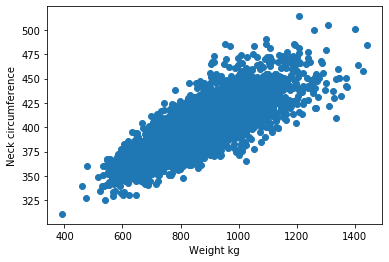

In [13]:
plt.scatter(x='weightkg',y='neckcircumference', data=df)
plt.ylabel('Neck circumference')
plt.xlabel('Weight kg')
plt.show()

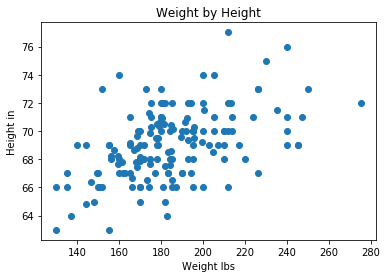

Text(0.5, 1, 'Avg Weight by Ethnicity')

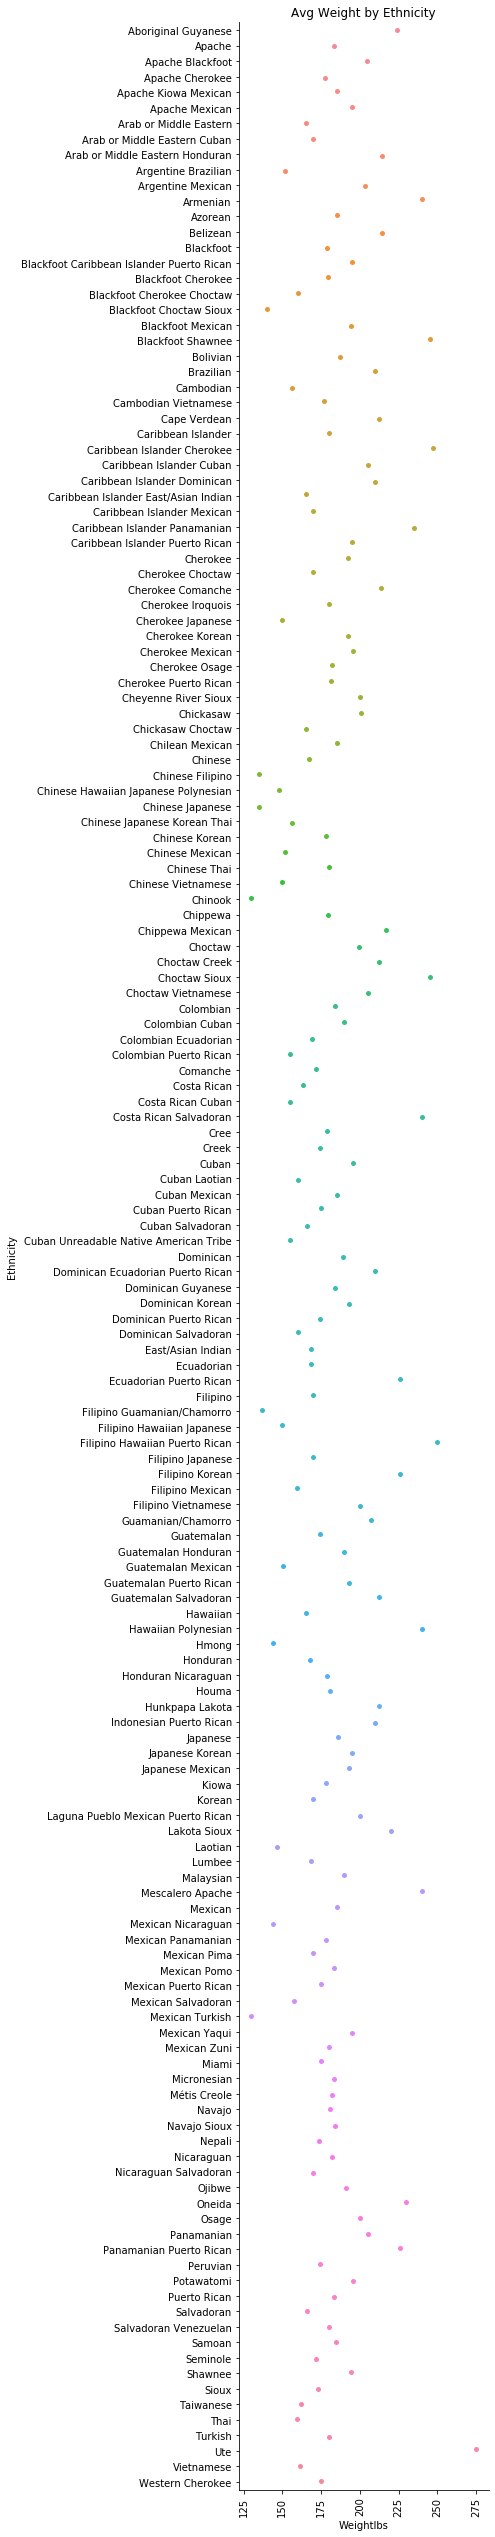

In [68]:
grouped=df.groupby('Ethnicity')

labels=[]
for name, group in grouped:
    labels.append(name)


#print(labels)    

summary_df=pd.DataFrame(columns=['Ethnicity','Weightlbs','Heightin'])
for name, group in df.groupby('Ethnicity'):
    weightlbs=group['Weightlbs'].mean()
    heightin=group['Heightin'].mean()
    index=len(summary_df)
    summary_df.loc[index]=[name,weightlbs,heightin]
    #x=np.arange(weight.size())
    #print(name,weight)
    #plt.scatter(y=weight, label=name)


plt.scatter(y='Heightin',x='Weightlbs',data=summary_df)
plt.xlabel("Weight lbs")
plt.ylabel("Height in")
plt.title("Weight by Height")
plt.show()

sns.catplot(x='Weightlbs',y='Ethnicity' ,data=summary_df,height=35,aspect=.2)
plt.xticks(rotation=90)
plt.title('Avg Weight by Ethnicity')
#x=np.arange(len(weight))
#plt.scatter(x=x,y=weight,label=labels)
#plt.legend(labels)
#df['Weightlbs'].plot()

In [75]:
model=TSNE(learning_rate=50)

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbre

<function matplotlib.pyplot.show(*args, **kw)>

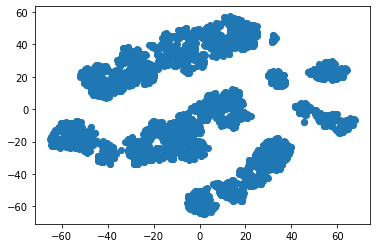

In [78]:
#non_numeric=['BMI_class','Height_class','Gender','Component','Branch']
numeric_df=df.select_dtypes(exclude='object')
#X=df.drop(non_numeric,axis=1)

#print(numeric_df.columns)

transformed=model.fit_transform(numeric_df)

xs=transformed[:,0]
ys=transformed[:,1]

plt.scatter(xs,ys)
plt.show

In [83]:
print("Age {} Weight lbs {} Height ft {}".format(df['Age'].mean(),df['Weightlbs'].mean(),df['Heightin'].mean()/12))

Age 30.158990690837825 Weight lbs 188.0048995590397 Height ft 5.83631389841581
